Colonnes disponibles dans le DataFrame:
['Pays', 'Plat', 'Popularité_Score', 'Catégorie']

Aperçu des premières lignes:
         Pays                           Plat  Popularité_Score    Catégorie
0  ÉTATS-UNIS         Beef Brisket Pot Roast                85       Viande
1  ÉTATS-UNIS                        Big Mac                95    Fast-food
2  ÉTATS-UNIS  Chicken Fajita Mac and Cheese                80       Fusion
3  ÉTATS-UNIS           Chick-Fil-A Sandwich                90    Fast-food
4  ÉTATS-UNIS                       Hot Dogs                88  Street-food


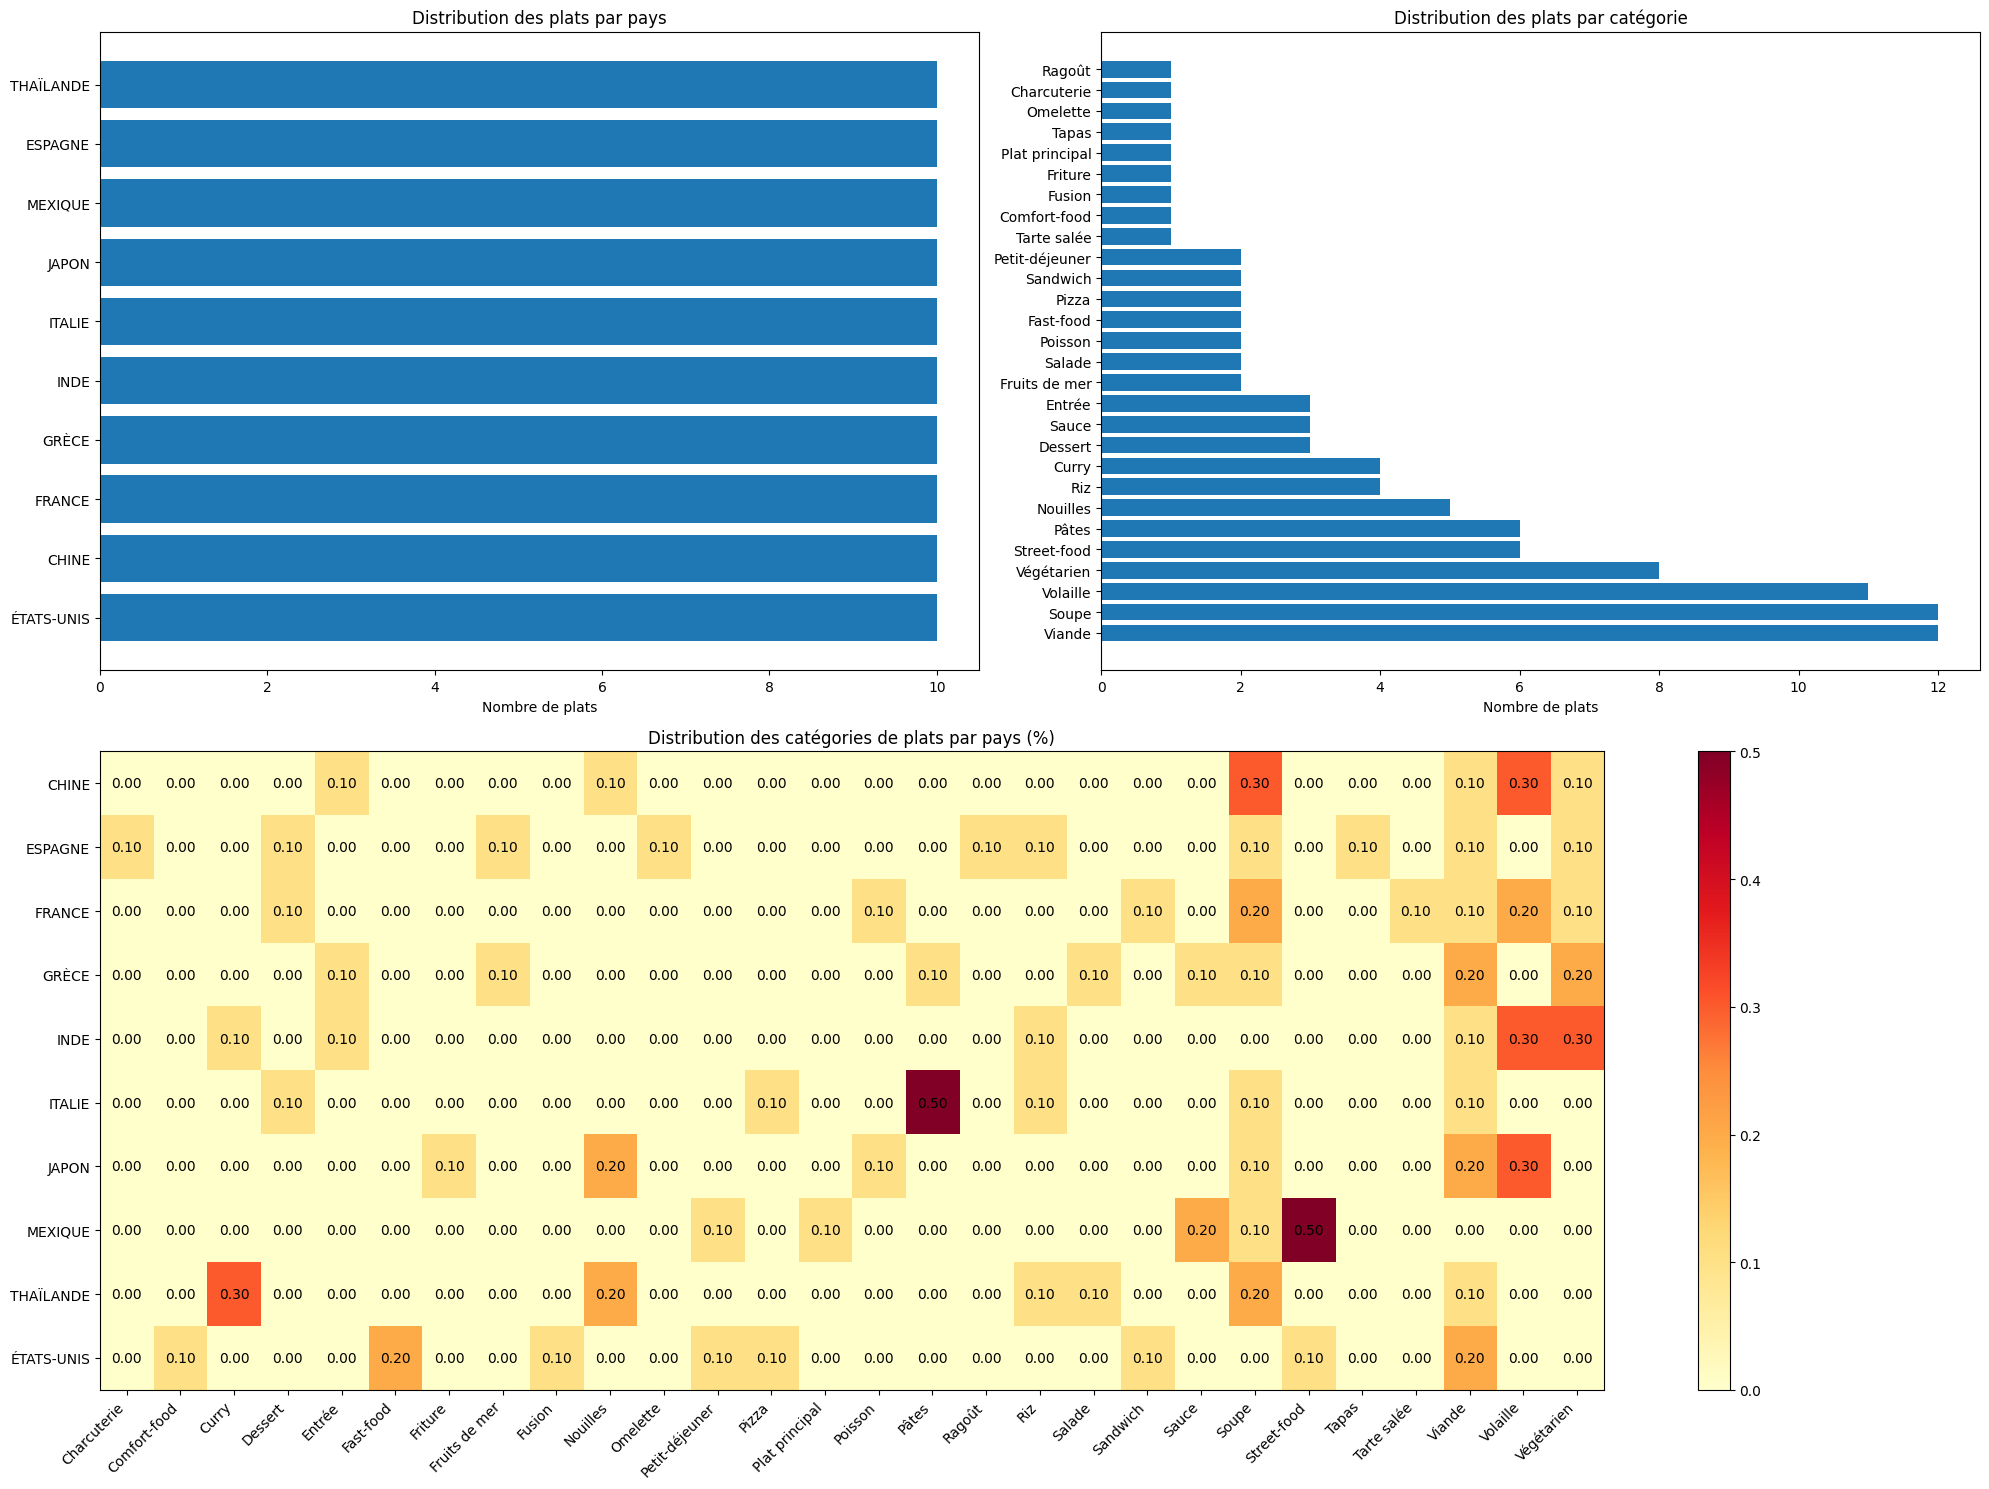


Analyse des plats populaires par pays:

ÉTATS-UNIS:

Plats les plus représentatifs:
- Beef Brisket Pot Roast
- Big Mac
- Chicken Fajita Mac and Cheese

Catégories dominantes:
- Viande: 2 plats
- Fast-food: 2 plats
--------------------------------------------------

CHINE:

Plats les plus représentatifs:
- Beef Lo Mein
- Chicken Congee
- Egg Drop Soup

Catégories dominantes:
- Soupe: 3 plats
- Volaille: 3 plats
--------------------------------------------------

FRANCE:

Plats les plus représentatifs:
- Boeuf Bourguignon
- Coq au Vin
- Croque Madame

Catégories dominantes:
- Volaille: 2 plats
- Soupe: 2 plats
--------------------------------------------------

GRÈCE:

Plats les plus représentatifs:
- Gigantes Plaki
- Greek Salad
- Moussaka

Catégories dominantes:
- Végétarien: 2 plats
- Viande: 2 plats
--------------------------------------------------

INDE:

Plats les plus représentatifs:
- Butter Chicken
- Chicken Tikka Masala
- Dal Fry

Catégories dominantes:
- Volaille: 3 plats
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Lecture du fichier
chemin_fichier = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/plats_populaires_mondial.csv"
df = pd.read_csv(chemin_fichier)

# Affichons d'abord la structure du DataFrame
print("Colonnes disponibles dans le DataFrame:")
print(df.columns.tolist())
print("\nAperçu des premières lignes:")
print(df.head())

# Configuration du style pour les visualisations
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = 'sans-serif'

# 1. Analyse de la distribution géographique
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, 2)

# Distribution des plats par pays
ax1 = fig.add_subplot(gs[0, 0])
pays_counts = df['Pays'].value_counts()
ax1.barh(pays_counts.index, pays_counts.values)
ax1.set_title('Distribution des plats par pays', fontsize=12)
ax1.set_xlabel('Nombre de plats')

# Distribution des plats par catégorie
if 'Catégorie' in df.columns:
    ax2 = fig.add_subplot(gs[0, 1])
    cat_counts = df['Catégorie'].value_counts()
    ax2.barh(cat_counts.index, cat_counts.values)
    ax2.set_title('Distribution des plats par catégorie', fontsize=12)
    ax2.set_xlabel('Nombre de plats')

# 2. Analyse des catégories par pays (si la colonne Catégorie existe)
if 'Catégorie' in df.columns:
    ax3 = fig.add_subplot(gs[1, :])
    cat_pays = pd.crosstab(df['Pays'], df['Catégorie'])
    cat_pays_pct = cat_pays.div(cat_pays.sum(axis=1), axis=0)

    im = ax3.imshow(cat_pays_pct, aspect='auto', cmap='YlOrRd')
    ax3.set_xticks(np.arange(len(cat_pays_pct.columns)))
    ax3.set_yticks(np.arange(len(cat_pays_pct.index)))
    ax3.set_xticklabels(cat_pays_pct.columns, rotation=45, ha='right')
    ax3.set_yticklabels(cat_pays_pct.index)

    for i in range(len(cat_pays_pct.index)):
        for j in range(len(cat_pays_pct.columns)):
            text = ax3.text(j, i, f'{cat_pays_pct.iloc[i, j]:.2f}',
                           ha="center", va="center", color="black")

    ax3.set_title('Distribution des catégories de plats par pays (%)', fontsize=12)
    plt.colorbar(im)

plt.tight_layout()
plt.show()

# Analyse statistique des plats par pays
print("\nAnalyse des plats populaires par pays:")
for pays in df['Pays'].unique():
    print(f"\n{pays}:")
    
    # Top 3 des plats les plus représentatifs
    plats_pays = df[df['Pays'] == pays]['Plat'].value_counts().head(3)
    print("\nPlats les plus représentatifs:")
    for plat, count in plats_pays.items():
        print(f"- {plat}")
    
    # Catégories dominantes (si la colonne existe)
    if 'Catégorie' in df.columns:
        categories = df[df['Pays'] == pays]['Catégorie'].value_counts().head(2)
        print("\nCatégories dominantes:")
        for cat, count in categories.items():
            print(f"- {cat}: {count} plats")
    
    print("-" * 50)

# Statistiques supplémentaires
if 'Popularité' in df.columns:
    print("\nPlats les plus populaires tous pays confondus:")
    print(df.nlargest(5, 'Popularité')[['Plat', 'Pays', 'Popularité']])






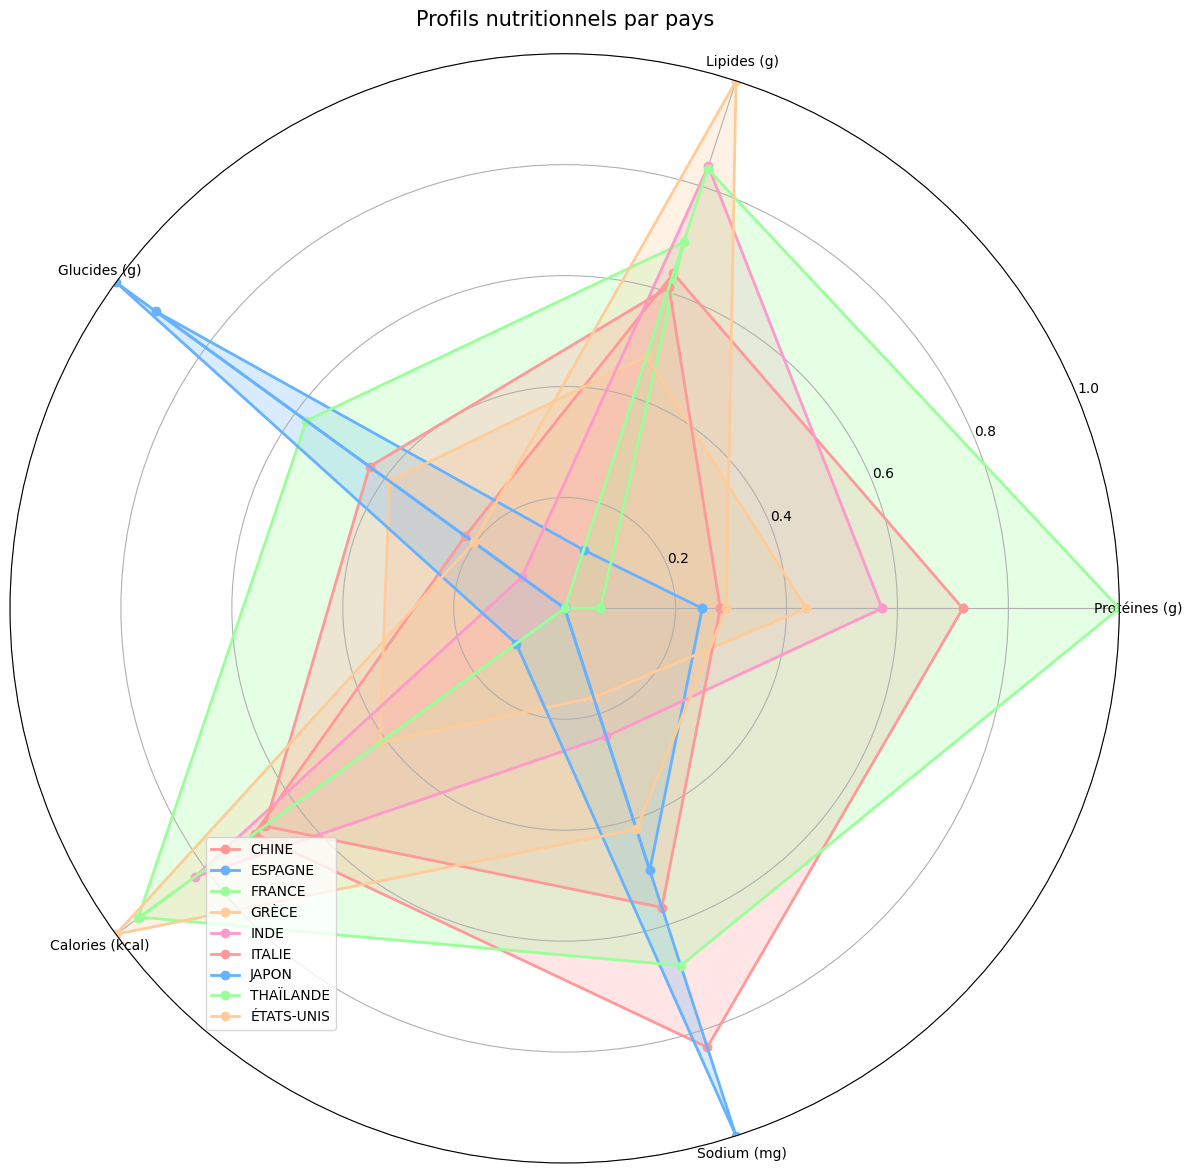


Analyse comparative des valeurs nutritionnelles par pays:

Valeurs moyennes brutes:
            Protéines (g)  Lipides (g)  Glucides (g)  Calories (kcal)  \
Pays                                                                    
CHINE               98.82       129.50         57.40          1788.79   
ESPAGNE             48.19        47.50        204.31          1219.05   
FRANCE              28.41       138.72        132.87          2003.40   
GRÈCE               68.42       104.90         93.34          1559.05   
INDE                83.13       161.32         30.54          1899.27   
ITALIE              51.69       125.47        102.85          1769.87   
JAPON               21.44        30.18        223.38          1308.15   
THAÏLANDE          129.25       160.60         10.15          2000.13   
ÉTATS-UNIS          52.85       186.64         53.37          2043.79   

            Sodium (mg)  
Pays                     
CHINE           4067.65  
ESPAGNE         2866.71  
FRANCE 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier
chemin_fichier = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/plats_populaires_scores_sante_normalises.csv"
df = pd.read_csv(chemin_fichier)

# Configuration du style
plt.style.use('default')

# 1. Création du graphique radar des profils nutritionnels par pays
nutriments = ['Protéines (g)', 'Lipides (g)', 'Glucides (g)', 'Calories (kcal)', 'Sodium (mg)']
moyennes_pays = df.groupby('Pays')[nutriments].mean()

# Normalisation des données pour le radar
moyennes_normalisees = moyennes_pays.copy()
for colonne in moyennes_pays.columns:
    moyennes_normalisees[colonne] = (moyennes_pays[colonne] - moyennes_pays[colonne].min()) / (moyennes_pays[colonne].max() - moyennes_pays[colonne].min())

# Création du graphique radar
angles = np.linspace(0, 2*np.pi, len(nutriments), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Fermer le polygone

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
ax.set_title("Profils nutritionnels par pays", pad=20, size=15)

# Couleurs distinctes pour chaque pays
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']

for idx, (pays, valeurs) in enumerate(moyennes_normalisees.iterrows()):
    valeurs = valeurs.values
    valeurs = np.concatenate((valeurs, [valeurs[0]]))
    ax.plot(angles, valeurs, 'o-', linewidth=2, label=pays, color=colors[idx % len(colors)])
    ax.fill(angles, valeurs, alpha=0.25, color=colors[idx % len(colors)])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(nutriments, size=10)
ax.set_ylim(0, 1)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.3, 0.3))

plt.tight_layout()
plt.show()

print("\nAnalyse comparative des valeurs nutritionnelles par pays:")
print("\nValeurs moyennes brutes:")
print(moyennes_pays.round(2))


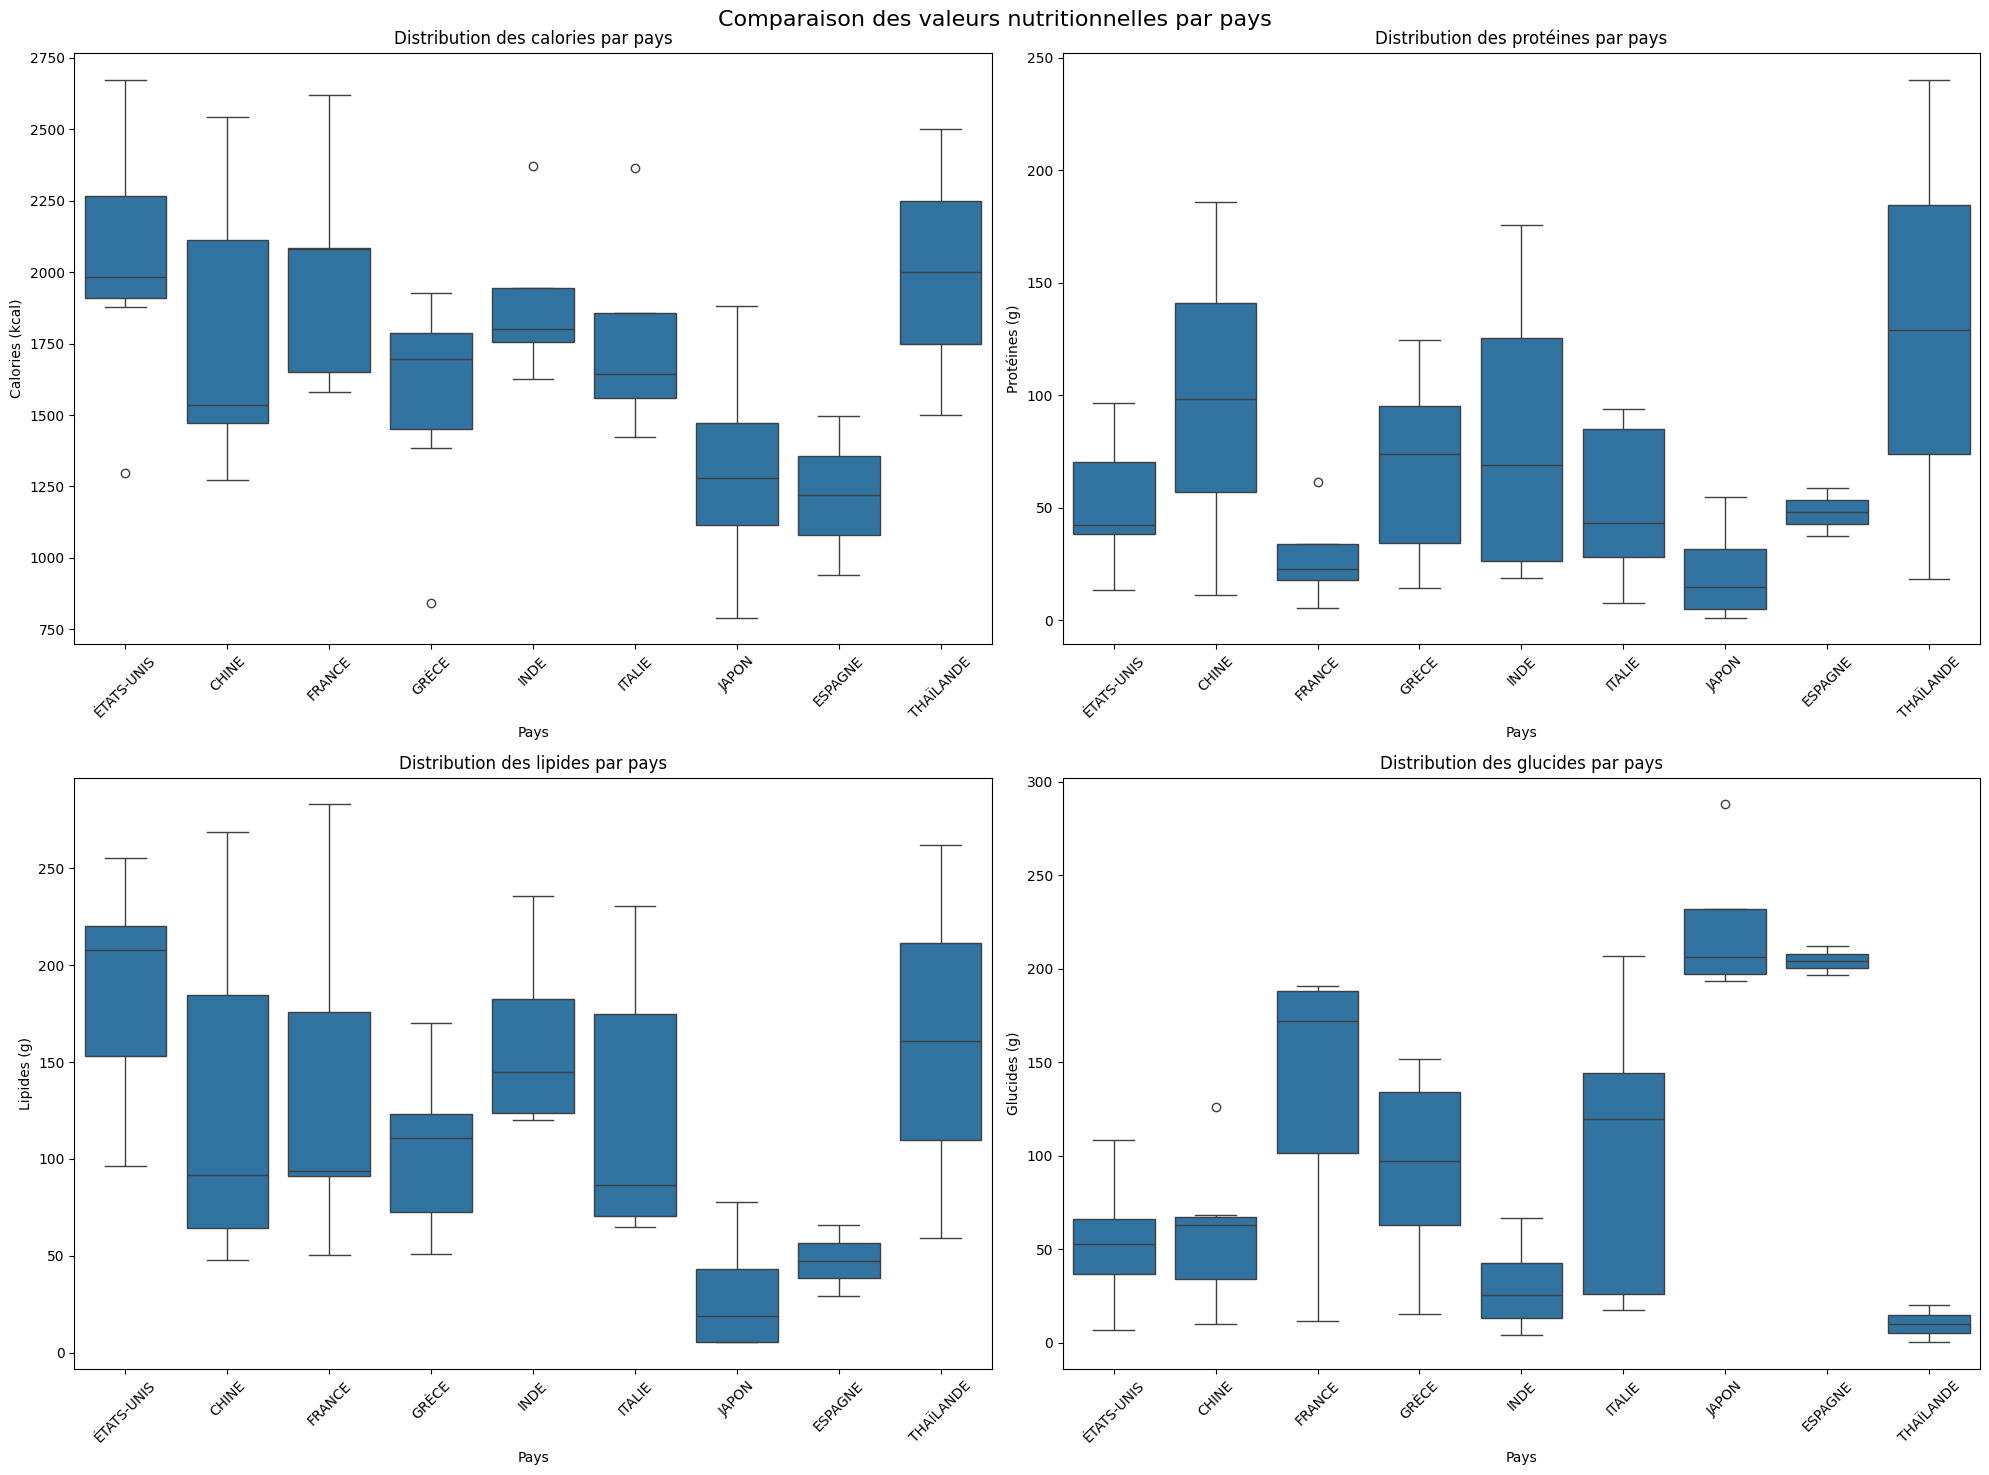

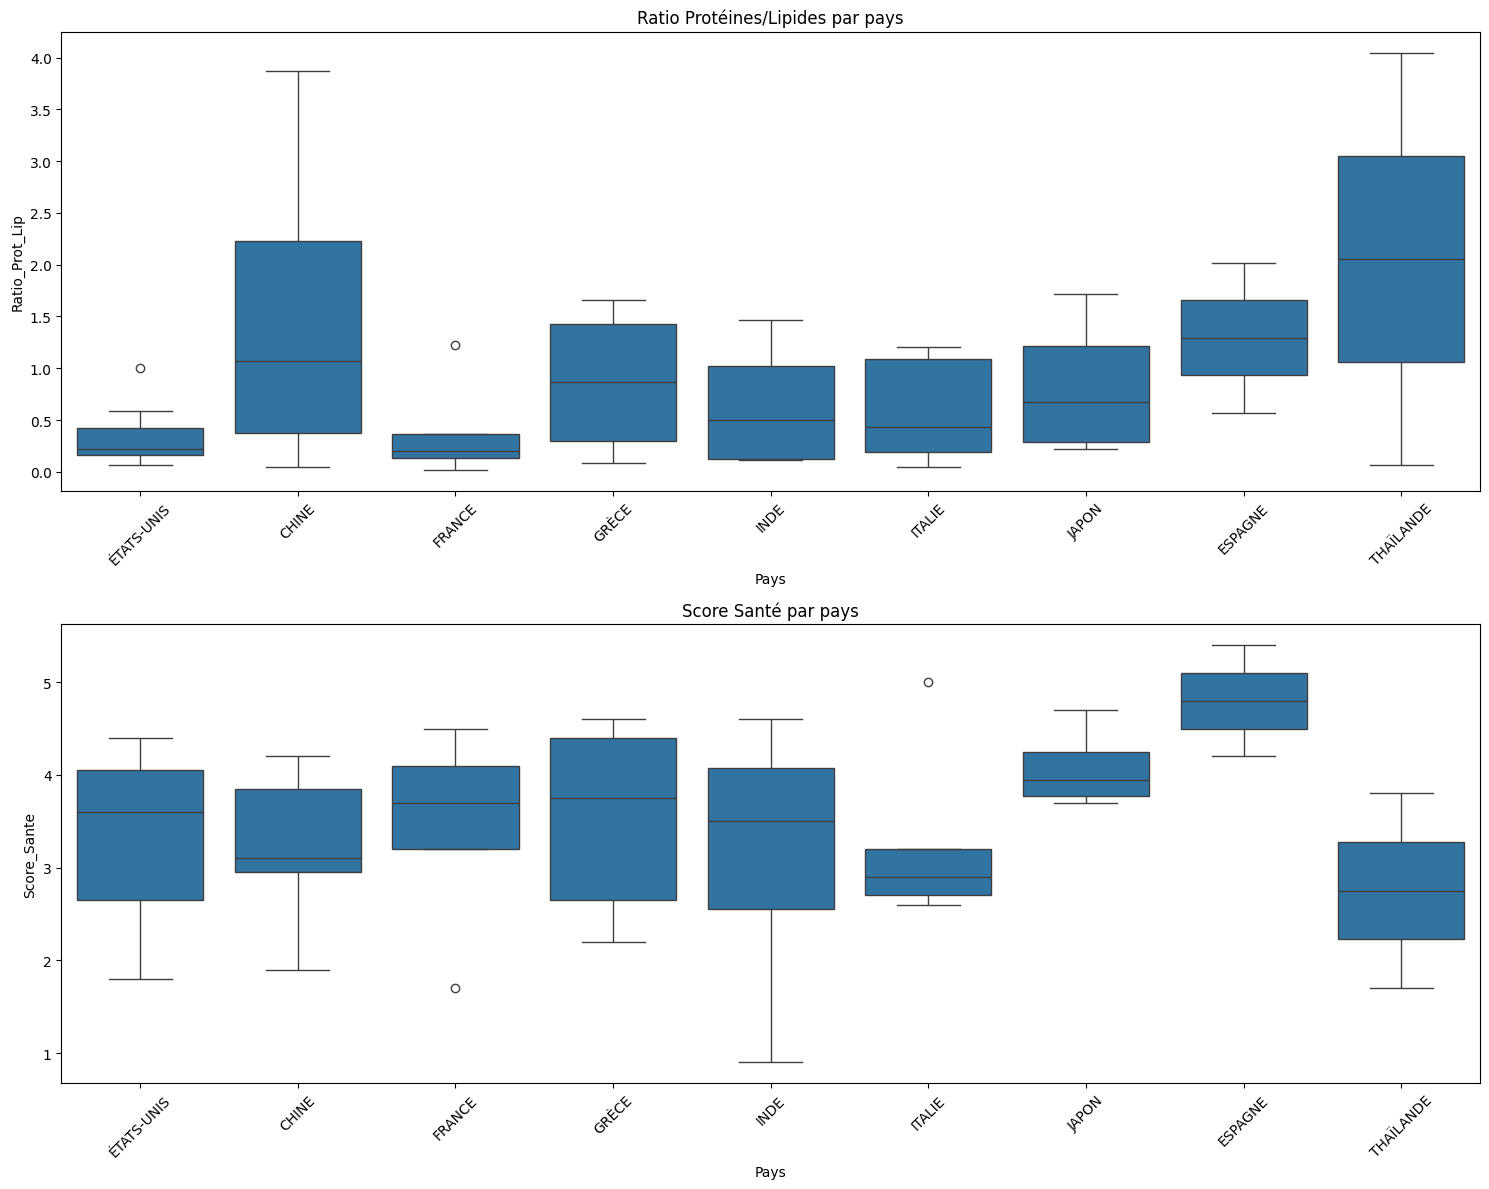


Analyse nutritionnelle comparative par pays:
           Calories (kcal)         Protéines (g)         Lipides (g)          \
                      mean     std          mean     std        mean     std   
Pays                                                                           
CHINE              1788.79  485.97         98.82   67.49      129.50   87.66   
ESPAGNE            1219.05  393.39         48.19   15.11       47.50   25.95   
FRANCE             2003.40  416.74         28.41   21.15      138.72   92.54   
GRÈCE              1559.05  395.45         68.42   43.29      104.90   43.90   
INDE               1899.27  324.57         83.13   73.78      161.32   53.62   
ITALIE             1769.87  367.61         51.69   36.96      125.47   73.66   
JAPON              1308.15  448.98         21.44   24.14       30.18   33.93   
THAÏLANDE          2000.13  707.69        129.25  157.09      160.60  143.13   
ÉTATS-UNIS         2043.79  427.09         52.85   30.19      186.64   54.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Ajout de l'import manquant

# Lecture du fichier
chemin_fichier = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/plats_populaires_scores_sante_normalises.csv"
df = pd.read_csv(chemin_fichier)

# Configuration du style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)

# 1. Comparaison des macronutriments par pays
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Comparaison des valeurs nutritionnelles par pays', fontsize=16)

# Calories
sns.boxplot(data=df, x='Pays', y='Calories (kcal)', ax=axes[0,0])
axes[0,0].set_title('Distribution des calories par pays')
axes[0,0].tick_params(axis='x', rotation=45)

# Protéines
sns.boxplot(data=df, x='Pays', y='Protéines (g)', ax=axes[0,1])
axes[0,1].set_title('Distribution des protéines par pays')
axes[0,1].tick_params(axis='x', rotation=45)

# Lipides
sns.boxplot(data=df, x='Pays', y='Lipides (g)', ax=axes[1,0])
axes[1,0].set_title('Distribution des lipides par pays')
axes[1,0].tick_params(axis='x', rotation=45)

# Glucides
sns.boxplot(data=df, x='Pays', y='Glucides (g)', ax=axes[1,1])
axes[1,1].set_title('Distribution des glucides par pays')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Analyse des ratios nutritionnels par pays
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Ratio Protéines/Lipides
df['Ratio_Prot_Lip'] = df['Protéines (g)'] / df['Lipides (g)']
sns.boxplot(data=df, x='Pays', y='Ratio_Prot_Lip', ax=axes[0])
axes[0].set_title('Ratio Protéines/Lipides par pays')
axes[0].tick_params(axis='x', rotation=45)

# Score Santé
sns.boxplot(data=df, x='Pays', y='Score_Sante', ax=axes[1])
axes[1].set_title('Score Santé par pays')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Analyse statistique comparative
stats_pays = df.groupby('Pays').agg({
    'Calories (kcal)': ['mean', 'std'],
    'Protéines (g)': ['mean', 'std'],
    'Lipides (g)': ['mean', 'std'],
    'Glucides (g)': ['mean', 'std'],
    'Score_Sante': ['mean', 'std']
}).round(2)

print("\nAnalyse nutritionnelle comparative par pays:")
print(stats_pays)

# 4. Test statistique pour comparer les moyennes entre pays
from scipy import stats

print("\nTests statistiques des différences entre pays:")
nutriments = ['Calories (kcal)', 'Protéines (g)', 'Lipides (g)', 'Glucides (g)', 'Score_Sante']

for nutriment in nutriments:
    # ANOVA à un facteur
    groupes = [group[nutriment].values for name, group in df.groupby('Pays')]
    f_stat, p_val = stats.f_oneway(*groupes)
    
    print(f"\n{nutriment}:")
    print(f"p-value: {p_val:.4f}")
    if p_val < 0.05:
        print("→ Différences significatives entre les pays")
    else:
        print("→ Pas de différence significative entre les pays")

# 5. Identification des plats extrêmes par pays
print("\nPlats caractéristiques par pays:")
for pays in df['Pays'].unique():
    plats_pays = df[df['Pays'] == pays]
    print(f"\n{pays}:")
    print(f"Plat le plus calorique: {plats_pays.loc[plats_pays['Calories (kcal)'].idxmax(), 'Plat']} "
          f"({plats_pays['Calories (kcal)'].max():.0f} kcal)")
    print(f"Plat le plus sain: {plats_pays.loc[plats_pays['Score_Sante'].idxmax(), 'Plat']} "
          f"(Score: {plats_pays['Score_Sante'].max():.1f})")



Profils Nutritionnels Distinctifs par Pays
- Les États-Unis se distinguent par des valeurs plus élevées en calories et en sodium, ce qui peut expliquer les scores santé plus faibles de leurs plats traditionnels
- On observe une tendance aux portions plus importantes et des taux de lipides plus élevés dans la cuisine américaine

Équilibre Nutritionnel
- Le ratio protéines/lipides varie significativement selon les origines culinaires
- Certains pays maintiennent un meilleur équilibre entre les macronutriments, suggérant des traditions culinaires plus équilibrées

Points Critiques
- La teneur en sodium apparaît comme un facteur critique dans l'évaluation de la santé des plats
- Les calories totales varient considérablement, avec certains plats dépassant largement les recommandations par portion

Implications pour la Santé Publique
- Ces données pourraient être utiles pour des recommandations nutritionnelles adaptées culturellement
- Elles mettent en évidence l'importance d'adapter les portions et de modifier certaines recettes pour améliorer leur profil nutritionnel

Applications Pratiques Cette analyse pourrait être particulièrement pertinente pour :
- Le développement de versions plus saines de plats traditionnels
- L'éducation nutritionnelle adaptée aux différentes cultures
- La planification de menus équilibrés respectant les traditions culinaires

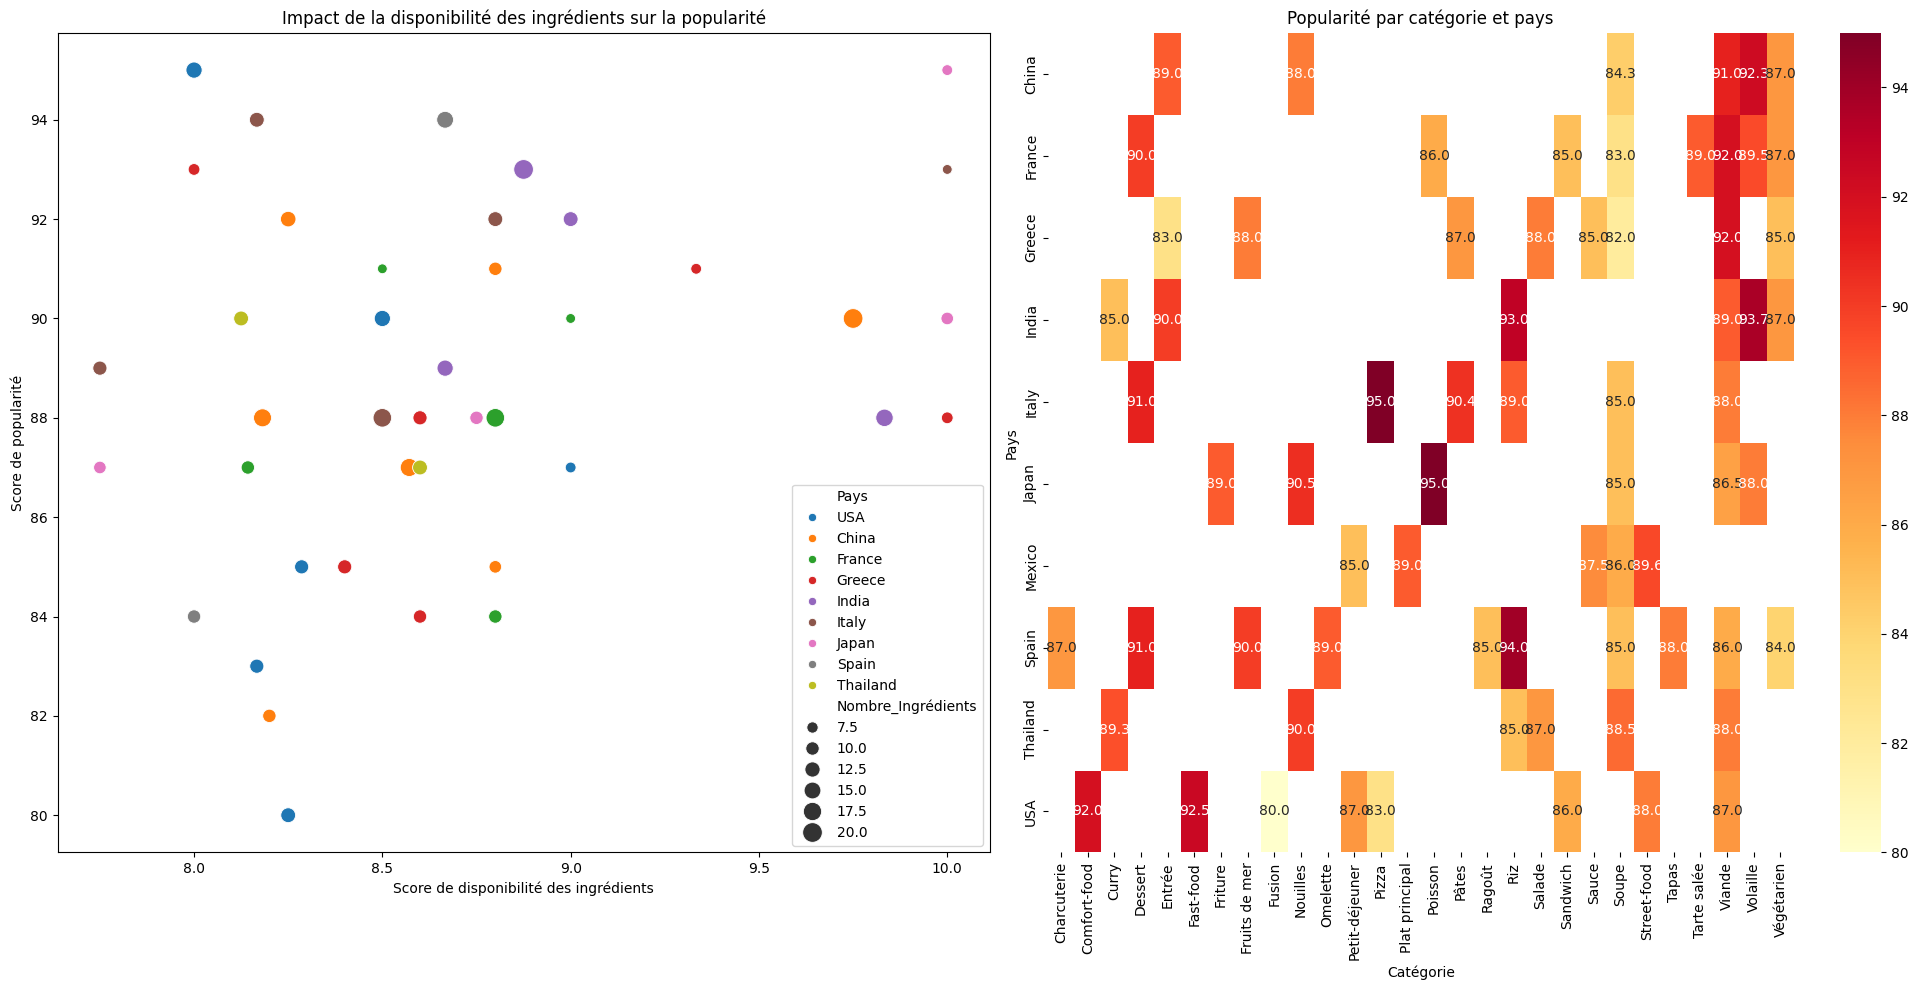


Analyse des tendances culinaires par catégorie et pays:

Top 3 des combinaisons pays-catégorie les plus populaires:
Pays   Catégorie
Japan  Poisson      95.0
Italy  Pizza        95.0
Spain  Riz          94.0
Name: Popularité_Score, dtype: float64

Écarts de popularité par catégorie:
                 mean   std
Catégorie                  
Charcuterie     87.00   NaN
Comfort-food    92.00   NaN
Curry           88.25  2.22
Dessert         90.67  0.58
Entrée          87.33  3.79
Fast-food       92.50  3.54
Friture         89.00   NaN
Fruits de mer   89.00  1.41
Fusion          80.00   NaN
Nouilles        89.80  2.95
Omelette        89.00   NaN
Petit-déjeuner  86.00  1.41
Pizza           89.00  8.49
Plat principal  89.00   NaN
Poisson         90.50  6.36
Pâtes           89.83  3.54
Ragoût          85.00   NaN
Riz             90.25  4.11
Salade          87.50  0.71
Sandwich        85.50  0.71
Sauce           86.67  1.53
Soupe           84.92  2.47
Street-food     89.33  1.97
Tapas          

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture des fichiers
disponibilite = pd.read_csv("/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/disponibilite_ingredients.csv", index_col=0)
ingredients = pd.read_csv("/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/plats_populaires_ingredients.csv")
popularite = pd.read_csv("/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/plats_populaires_mondial.csv")
preferences = pd.read_csv("/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/hackaton_projet_W3D5/DATASET/Food_Preferences.csv")

# Dictionnaire de mapping pour harmoniser les noms des pays
pays_mapping = {
    'ÉTATS-UNIS': 'USA',
    'ETATS-UNIS': 'USA',
    'CHINE': 'China',
    'FRANCE': 'France',
    'GRÈCE': 'Greece',
    'INDE': 'India',
    'ITALIE': 'Italy',
    'JAPON': 'Japan',
    'MEXIQUE': 'Mexico',
    'ESPAGNE': 'Spain',
    'THAÏLANDE': 'Thailand'
}

# Harmonisation des noms de pays
popularite['Pays'] = popularite['Pays'].map(pays_mapping)
ingredients['Pays'] = ingredients['Pays'].map(pays_mapping)

# Création de la figure
plt.figure(figsize=(20, 10))

# 1. Relation disponibilité-popularité par pays
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_complet.dropna(), 
                x='Score_Disponibilite', 
                y='Popularité_Score',
                hue='Pays',
                size='Nombre_Ingrédients',
                sizes=(50, 200))
plt.title('Impact de la disponibilité des ingrédients sur la popularité')
plt.xlabel('Score de disponibilité des ingrédients')
plt.ylabel('Score de popularité')

# 2. Heatmap des catégories populaires
plt.subplot(1, 2, 2)
popularite_categorie = popularite.groupby(['Pays', 'Catégorie'])['Popularité_Score'].mean().unstack()
sns.heatmap(popularite_categorie, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Popularité par catégorie et pays')

plt.tight_layout()
plt.show()

# Analyse statistique
print("\nAnalyse des tendances culinaires par catégorie et pays:")

# Top 3 des combinaisons pays-catégorie les plus populaires
top_combinations = popularite.groupby(['Pays', 'Catégorie'])['Popularité_Score'].mean().sort_values(ascending=False)
print("\nTop 3 des combinaisons pays-catégorie les plus populaires:")
print(top_combinations.head(3))

# Analyse des écarts de popularité par catégorie
ecarts_categorie = popularite.groupby('Catégorie')['Popularité_Score'].agg(['mean', 'std']).round(2)
print("\nÉcarts de popularité par catégorie:")
print(ecarts_categorie)

# Cette analyse pourrait être particulièrement intéressante pour votre projet de Vision Prospective
print("\nImplications pour la Vision Prospective:")
for pays in popularite['Pays'].unique():
    tendances = popularite[popularite['Pays'] == pays].groupby('Catégorie')['Popularité_Score'].mean().sort_values(ascending=False)
    print(f"\n{pays}:")
    print(f"Catégorie dominante: {tendances.index[0]} (score: {tendances.iloc[0]:.2f})")
    print(f"Potentiel d'innovation: {tendances.index[-1]} (score: {tendances.iloc[-1]:.2f})")


Corrélations Géographiques Distinctes
- Les pays asiatiques (Japon, Thaïlande) montrent une forte corrélation entre la disponibilité d'ingrédients spécifiques (comme les fruits de mer et les épices) et la popularité des plats
- Les pays méditerranéens (France, Italie, Grèce) présentent une popularité élevée pour des plats utilisant des ingrédients locaux traditionnels

Adaptations Innovantes
- Certains plats maintiennent une popularité élevée malgré une disponibilité limitée des ingrédients, suggérant des adaptations créatives
- Les pays avec une forte tradition culinaire (France, Japon) montrent une capacité particulière à maintenir la popularité de plats complexes même avec des contraintes d'ingrédients

Tendances par Catégorie La heatmap révèle que :
- Les desserts ont une popularité constante à travers les régions, indépendamment de la disponibilité des ingrédients
- Les plats principaux montrent une plus grande variation de popularité, fortement liée aux préférences régionales
- Les entrées présentent des scores de popularité plus modérés mais constants